<a href="https://colab.research.google.com/github/V4L3NTINA/HIGI2022/blob/main/HIGI_11NOV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import math as math
from scipy.optimize import minimize
from scipy import stats

In [ ]:

data=np.load("line.npy")
x = data[0]
y = data[1]
yer = data[2]

<ErrorbarContainer object of 3 artists>

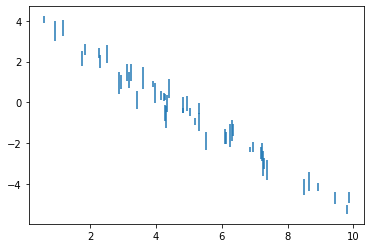

In [ ]:
plt.errorbar(x, y, yer, fmt='none')

In [ ]:
plt.errorbar?

In [ ]:
data


array([[ 0.59677897,  0.9210494 ,  1.15618395,  1.75451756,  1.8249173 ,
         2.26851454,  2.28263231,  2.50455365,  2.86139335,  2.93714046,
         3.12261223,  3.17285482,  3.22958914,  3.43178016,  3.61788656,
         3.92117518,  3.98044255,  4.14826212,  4.2310646 ,  4.2583029 ,
         4.26351307,  4.30862763,  4.33701173,  4.38572245,  4.80931901,
         4.83034264,  4.93685098,  5.01836676,  5.19485119,  5.31551374,
         5.31827587,  5.51314769,  6.11023511,  6.12894526,  6.23952952,
         6.30976124,  6.34400959,  6.84829739,  6.96469186,  7.1946897 ,
         7.22443383,  7.24455325,  7.29049707,  7.37995406,  8.49431794,
         8.66309158,  8.93389163,  9.44160018,  9.80764198,  9.85559786],
       [ 4.05604445,  3.49473158,  3.64659922,  2.13858412,  2.592304  ,
         2.4144795 ,  2.00068802,  2.34549221,  0.96557623,  0.99178712,
         1.46307492,  1.10095878,  1.46034876,  0.13653165,  1.19421147,
         0.89993786,  0.4632976 ,  0.32173118,  0.

In [ ]:

y1 = 
y2 = 
x1 = 
x2 =

m = (4.05604445 - (-4.05604445))/(0.59677897 - 9.85559786)
b=1.0
a_fit, b_fit = np.polyfit(x,y, 1)

In [ ]:
data


array([[ 0.59677897,  0.9210494 ,  1.15618395,  1.75451756,  1.8249173 ,
         2.26851454,  2.28263231,  2.50455365,  2.86139335,  2.93714046,
         3.12261223,  3.17285482,  3.22958914,  3.43178016,  3.61788656,
         3.92117518,  3.98044255,  4.14826212,  4.2310646 ,  4.2583029 ,
         4.26351307,  4.30862763,  4.33701173,  4.38572245,  4.80931901,
         4.83034264,  4.93685098,  5.01836676,  5.19485119,  5.31551374,
         5.31827587,  5.51314769,  6.11023511,  6.12894526,  6.23952952,
         6.30976124,  6.34400959,  6.84829739,  6.96469186,  7.1946897 ,
         7.22443383,  7.24455325,  7.29049707,  7.37995406,  8.49431794,
         8.66309158,  8.93389163,  9.44160018,  9.80764198,  9.85559786],
       [ 4.05604445,  3.49473158,  3.64659922,  2.13858412,  2.592304  ,
         2.4144795 ,  2.00068802,  2.34549221,  0.96557623,  0.99178712,
         1.46307492,  1.10095878,  1.46034876,  0.13653165,  1.19421147,
         0.89993786,  0.4632976 ,  0.32173118,  0.

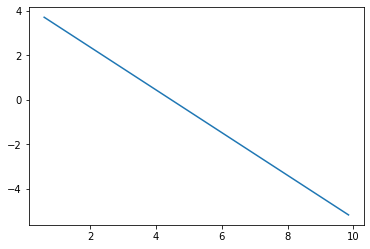

In [ ]:
plt.plot(x, a_fit*x+b_fit)

In [ ]:
print(a_fit, b_fit)

-0.9581362220081967 4.274384273855281


-0.9581362220081967 4.274384273855281


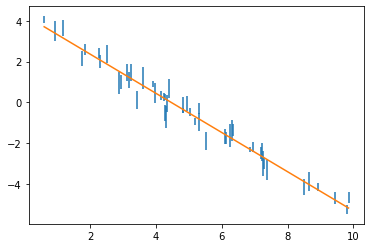

In [ ]:

plt.errorbar(x, y, yer, fmt='none')
plt.plot(x, a_fit*x+b_fit)
print(a_fit, b_fit)

-0.876147270659055 1.0


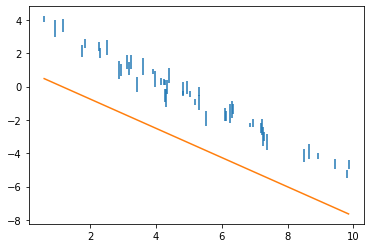

In [ ]:
plt.errorbar(x, y, yer, fmt='none')
plt.plot(x, m*x+b)
print(m, b)

In [ ]:

def chi2(params):
  a = params[0]
  b = params[1]
  ymodel = a*x+b
  chi2=0.5*np.sum((y-ymodel)**2/yer**2)
  return chi2

In [ ]:
res = minimize(chi2, x0=[-0,0], options={'disp':True})
a_op, b_op = res.x
print(a_op, b_op)

Optimization terminated successfully.
         Current function value: 27.463454
         Iterations: 4
         Function evaluations: 18
         Gradient evaluations: 6
-0.9716812748413178 4.399210573461103


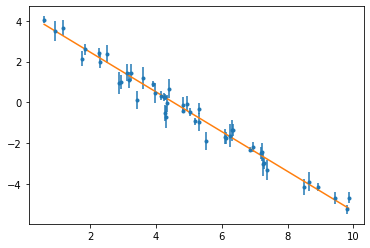

In [ ]:
plt.errorbar( x, y, yer, fmt='.')
plt.plot( x, a_op*x+b_op )

In [ ]:

m_true = -0.9594
b_true = 4.294

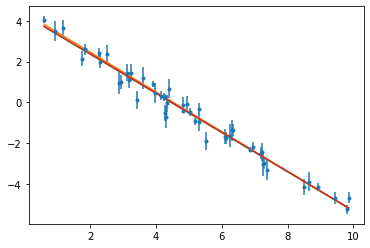

In [ ]:
plt.errorbar( x, y, yer, fmt='.' )
plt.plot(x, a_op*x+b_op)
plt.plot(x, a_fit*x+b_fit)
# plt.plot(x, a_reg*x+b_reg)
plt.plot(x,m_true*x+b_true)



---



In [ ]:
def euler(x0,v0,omega_0,t0=0,dt=0.01,nsteps=100):
  x=[x0]
  t=[t0]
  for i in range(1,nsteps):
    vi=v0-omega_0**2*x0*dt
    xi=x0+v0*dt
    x.append(xi)
    t.append(t0+dt*i)
    x0=xi
    v0=vi
  return x,t

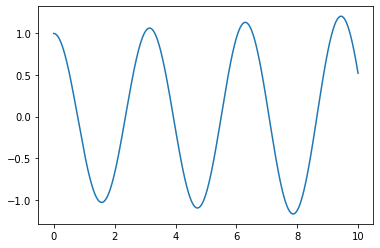

In [ ]:

x,t=euler(1,0,2,nsteps=1000)
plt.plot(t,x)


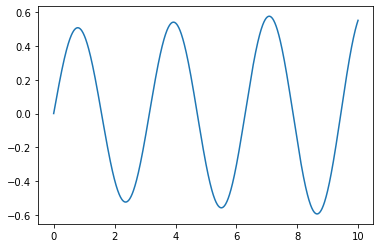

In [ ]:

x,t=euler(0,1,2,nsteps=1000)
plt.plot(t,x)

In [ ]:

def euler(x0,v0,omega_0,t0=0,dt=0.01,nsteps=100):

  x=[x0]
  t=[t0]
  for i in range(1,nsteps):
    vi=v0-omega_0**2*x0*dt
    xi=x0+v0*dt
    x.append(xi)
    t.append(t0+dt*i)
    x0=xi
    v0=vi

  return x,t

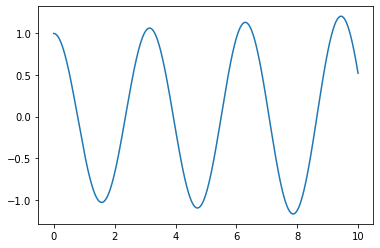

In [ ]:

x,t=euler(1,0,2,nsteps=1000)
plt.plot(t,x)

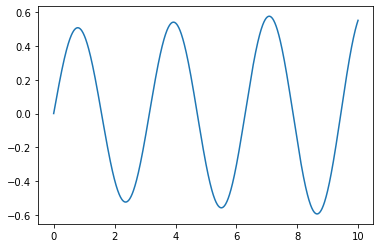

In [ ]:

x,t=euler(0,1,2,nsteps=1000)
plt.plot(t,x)

In [ ]:

def euler2(x0,v0,omega_0,t10=0,dt1=0.01,nsteps=100):
  x1=[x0]
  t1=[t10]
  for i in range(1,nsteps):
    vi=v0-omega_0**2*np.sin(x0)*dt1
    xi=x0+v0*dt1
    x1.append(xi)
    t1.append(t10+dt1*i)
    x0=xi
    v0=vi
  return x1,t1

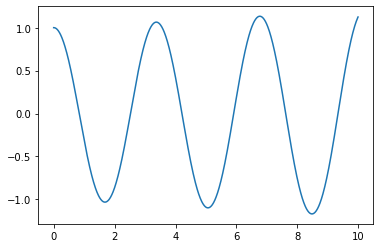

In [ ]:

x1,t1=euler2(1,0,2,nsteps=1000)
plt.plot(t1,x1)

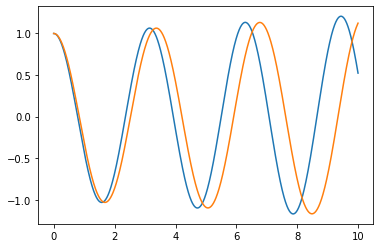

In [ ]:

x,t=euler(1,0,2,nsteps=1000)
x1,t1=euler2(1,0,2,nsteps=1000)
plt.plot(t,x)
plt.plot(t1,x1)



---



---



---



In [ ]:

import os
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = 'https://www.indexmundi.com/map/?t=0&v=25&r=xx&1=en'
html = requests.get(url).content
Birth_rate = pd.read_html(html)
Birth_rate=Birth_rate[1]

In [ ]:
Birth_rate.head()

,Country,"Birth rate (births/1,000 population)",Year
0,Niger,48,2020
1,Angola,43,2020
2,Uganda,42,2020
3,Mali,42,2020
4,Benin,42,2020


In [ ]:
Birth_rate.keys()

Index(['Country', 'Birth rate (births/1,000 population)', 'Year'], dtype='object')

In [ ]:
Birth_rate.describe()

,"Birth rate (births/1,000 population)",Year
count,198.000000,198.000000
mean,18.919192,2019.959596
std,9.592379,0.568535
min,6.000000,2012.000000
25%,11.000000,2020.000000
50%,16.000000,2020.000000
75%,23.750000,2020.000000
max,48.000000,2020.000000


In [ ]:
Birth_rate[Birth_rate['Birth rate (births/1,000 population)']>19]

,Country,"Birth rate (births/1,000 population)",Year
0,Niger,48,2020
1,Angola,43,2020
2,Uganda,42,2020
3,Mali,42,2020
4,Benin,42,2020
...,...,...,...
68,Bolivia,21,2020
69,Kyrgyzstan,21,2020
70,Kiribati,20,2020
71,Algeria,20,2020


In [ ]:
from urllib import request

In [ ]:
data_2021=pd.read_csv("/content/202101010000Lluv.csv", encoding = 'ISO-8859-1')
data_2022=pd.read_csv("/content/202201010000Lluv.csv", encoding = 'ISO-8859-1')

In [ ]:
data_2022

,LON,LAT,EDO,CLAVE,ESTACION,ene-22
0,-102.309722,21.895000,AGS,AGSAG,"Aguascalientes, Ags.",1.50
1,-102.585833,22.177222,AGS,ALMAG,"Alamitos, Ags.",5.50
2,-102.184167,21.738611,AGS,BRTAG,"San Bartolo, Ags.",0.00
3,-102.712222,21.849167,AGS,CALVILLO,"Calvillo, Ags. SMN*",1.75
4,-102.676944,21.997500,AGS,CDRAG,"La Codorniz, Ags.",0.00
...,...,...,...,...,...,...
1247,-102.344167,23.288611,ZAC,VCOZC,"Villa de Cos, Zac.",0.00
1248,-101.715833,22.347500,ZAC,VHGZC,"Villa Hidalgo, Zac.",0.01
1249,-103.337500,21.588889,ZAC,VILZC,"José María Morelos, Zac.",1.30
1250,-102.566389,22.778333,ZAC,ZACATECASob,"Observatorio de Zacatecas, Zac. SMN*",0.60


In [ ]:
data_2022[data_2022["ESTACION"]=="Aguascalientes, Ags."]

,LON,LAT,EDO,CLAVE,ESTACION,ene-22
0,-102.309722,21.895,AGS,AGSAG,"Aguascalientes, Ags.",1.5


In [ ]:
data_2022[data_2022["EDO"]=="AGS"]

,LON,LAT,EDO,CLAVE,ESTACION,ene-22
0,-102.309722,21.895000,AGS,AGSAG,"Aguascalientes, Ags.",1.50
1,-102.585833,22.177222,AGS,ALMAG,"Alamitos, Ags.",5.50
2,-102.184167,21.738611,AGS,BRTAG,"San Bartolo, Ags.",0.00
3,-102.712222,21.849167,AGS,CALVILLO,"Calvillo, Ags. SMN*",1.75
4,-102.676944,21.997500,AGS,CDRAG,"La Codorniz, Ags.",0.00
5,-102.197222,22.007222,AGS,CHOAG,"Cañada Honda, Ags.",0.01
6,-102.189167,21.826667,AGS,CLVAG,"Calvillo, Ags.",1.70
7,-101.992222,21.897778,AGS,CNSAG,"Los Conos, Ags.",0.10
8,-102.296667,22.362778,AGS,CSOAG,"Cosío, Ags.",0.01
9,-102.356944,22.121667,AGS,JCQAG,"Jocoque, Ags.",0.00


In [ ]:
data_2021.keys()

Index(['LON', 'LAT', 'EDO', 'CLAVE', 'ESTACION', 'ene-21'], dtype='object')

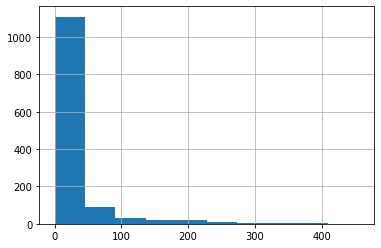

In [ ]:
data_2021['ene-21'].hist()

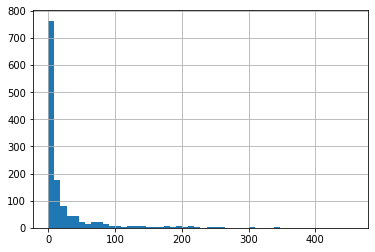

In [ ]:
data_2021['ene-21'].hist(bins=50)

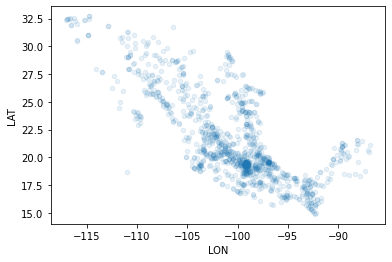

In [ ]:
data_2021.plot(kind="scatter", x="LON", y="LAT",alpha=0.1)

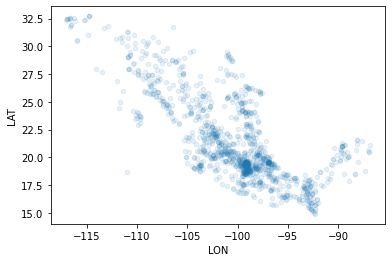

In [ ]:
data_2022.plot(kind="scatter", x="LON", y="LAT",alpha=0.1)

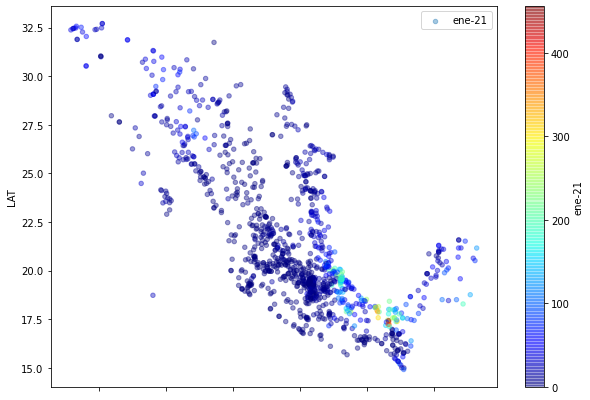

In [ ]:
# c is the attribute we'll map onto colors, s is the attribute we'll represent with circle size.
data_2021.plot(kind="scatter", x="LON", y="LAT",c='ene-21', label="ene-21", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

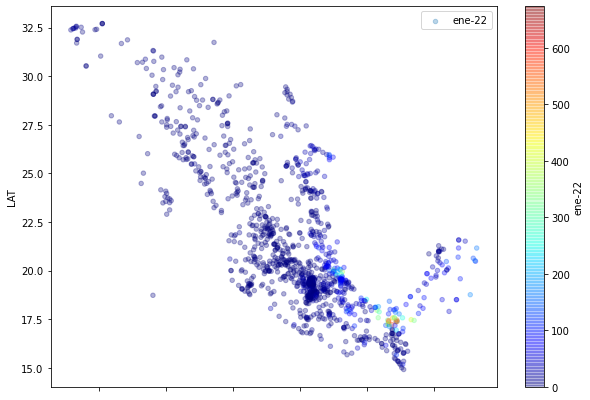

In [ ]:
# c is the attribute we'll map onto colors, s is the attribute we'll represent with circle size.
data_2022.plot(kind="scatter", x="LON", y="LAT",c='ene-22', label="ene-22", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.3, figsize=(10,7),
)
plt.legend()
plt.show()

In [ ]:
#Función merge: une dos tablas
  data_2021_2022=pd.merge(data_2021,data_2022,on=["LON","LAT","EDO","CLAVE","ESTACION"],how="outer")

In [ ]:

data_2021_2022

,LON,LAT,EDO,CLAVE,ESTACION,ene-21,ene-22
0,-102.309722,21.895000,AGS,AGSAG,"Aguascalientes, Ags.",11.2,1.50
1,-102.184167,21.738611,AGS,BRTAG,"San Bartolo, Ags.",4.3,0.00
2,-102.712222,21.849167,AGS,CALVILLO,"Calvillo, Ags. SMN*",7.4,1.75
3,-102.676944,21.997500,AGS,CDRAG,"La Codorniz, Ags.",3.5,0.00
4,-102.189167,21.826667,AGS,CLVAG,"Calvillo, Ags.",11.6,1.70
...,...,...,...,...,...,...,...
1446,-101.985556,22.264722,ZAC,LORZC,"Loreto, Zac.",NaN,0.00
1447,-103.443056,24.287222,ZAC,MGAZC,"Miguel Auza, Zac.",NaN,0.00
1448,-102.615000,24.983056,ZAC,NTAZC,"Nuevo Tampico, Zac.",NaN,1.13
1449,-102.269444,22.577778,ZAC,OCAZC,"Ojo Caliente, Zac.",NaN,1.30


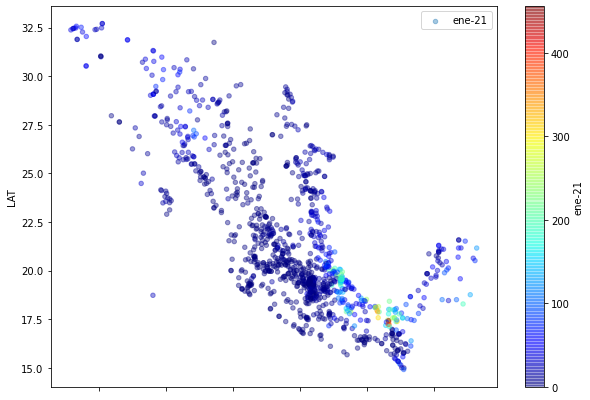

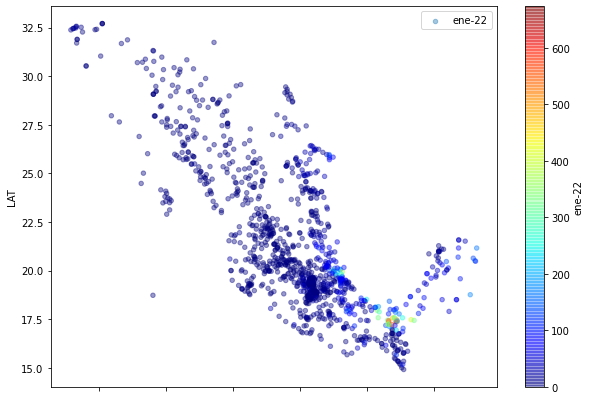

In [ ]:

# c is the attribute we'll map onto colors, s is the attribute we'll represent with circle size.
for i in range(1,3):
  data_2021_2022.plot(kind="scatter", x="LON", y="LAT",c=f"ene-2{i}", label=f"ene-2{i}", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
  plt.legend()
  plt.show()

In [ ]:

%pip install tabula-py
import tabula

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
